In [90]:
import pandas as pd
from sklearn import cluster
from sklearn.mixture import GaussianMixture
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import seaborn as sns


In [5]:
df = pd.read_csv('Wholesale_customers_data.csv')
display(df.head())
print(df.shape)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


(440, 8)


In [32]:
scaler = preprocessing.StandardScaler()
scaled_df = df.copy()
columns_to_scale = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']
scaled_df[columns_to_scale] = scaler.fit_transform(scaled_df[columns_to_scale])
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
display(scaled_df)


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,2,3,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,2,3,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,2,3,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,1,3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,2,3,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347
...,...,...,...,...,...,...,...,...
435,1,3,1.401312,0.848446,0.850760,2.075222,-0.566831,0.241091
436,1,3,2.155293,-0.592142,-0.757165,0.296561,-0.585519,0.291501
437,2,3,0.200326,1.314671,2.348386,-0.543380,2.511218,0.121456
438,1,3,-0.135384,-0.517536,-0.602514,-0.419441,-0.569770,0.213046


In [89]:
# df.hist(bins=10, figsize=(10,8))
# scaled_df.hist(bins=100, figsize=(10,8))

In [94]:
k_means = cluster.KMeans(n_clusters=2, n_init='auto', random_state=2)
k_means_pred = k_means.fit_predict(df)

# scaled_df_k_means = k_means.fit_predict(scaled_df)

print(k_means_pred)
# print(scaled_df_k_means)

k_means_df = pd.DataFrame(k_means_pred, columns=['clusters'])

print(silhouette_score(df, k_means_pred))
# print(silhouette_score(df, scaled_df_k_means))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
0.6158373884927455


In [61]:
# silhouette_scores = []

# for n_clusters in range(2, 11):
#     # Fit KMeans clustering model
#     k_means = cluster.KMeans(n_clusters=n_clusters, n_init='auto')    
#     k_means_pred = k_means.fit_predict(df)

#     silhouette_avg = silhouette_score(df, k_means_pred)
#     silhouette_scores.append(silhouette_avg)

# # print(silhouette_scores)

# plt.plot(range(2, 11), silhouette_scores, marker='o')
# plt.title('Silhouette Score vs. Number of Clusters')
# plt.xlabel('Number of Clusters')
# plt.ylabel('Silhouette Score')
# plt.show()

In [76]:
gm = GaussianMixture(n_components=2, covariance_type='tied', random_state=2)
gm_pred = gm.fit_predict(df)

print(silhouette_score(df, gm_pred))


0.6981741820111256


In [86]:
spectral = cluster.SpectralClustering(n_components=6)
spectral_pred = spectral.fit_predict(df)

print(silhouette_score(df, spectral_pred))



-0.3402250955123121


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,clusters
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,0


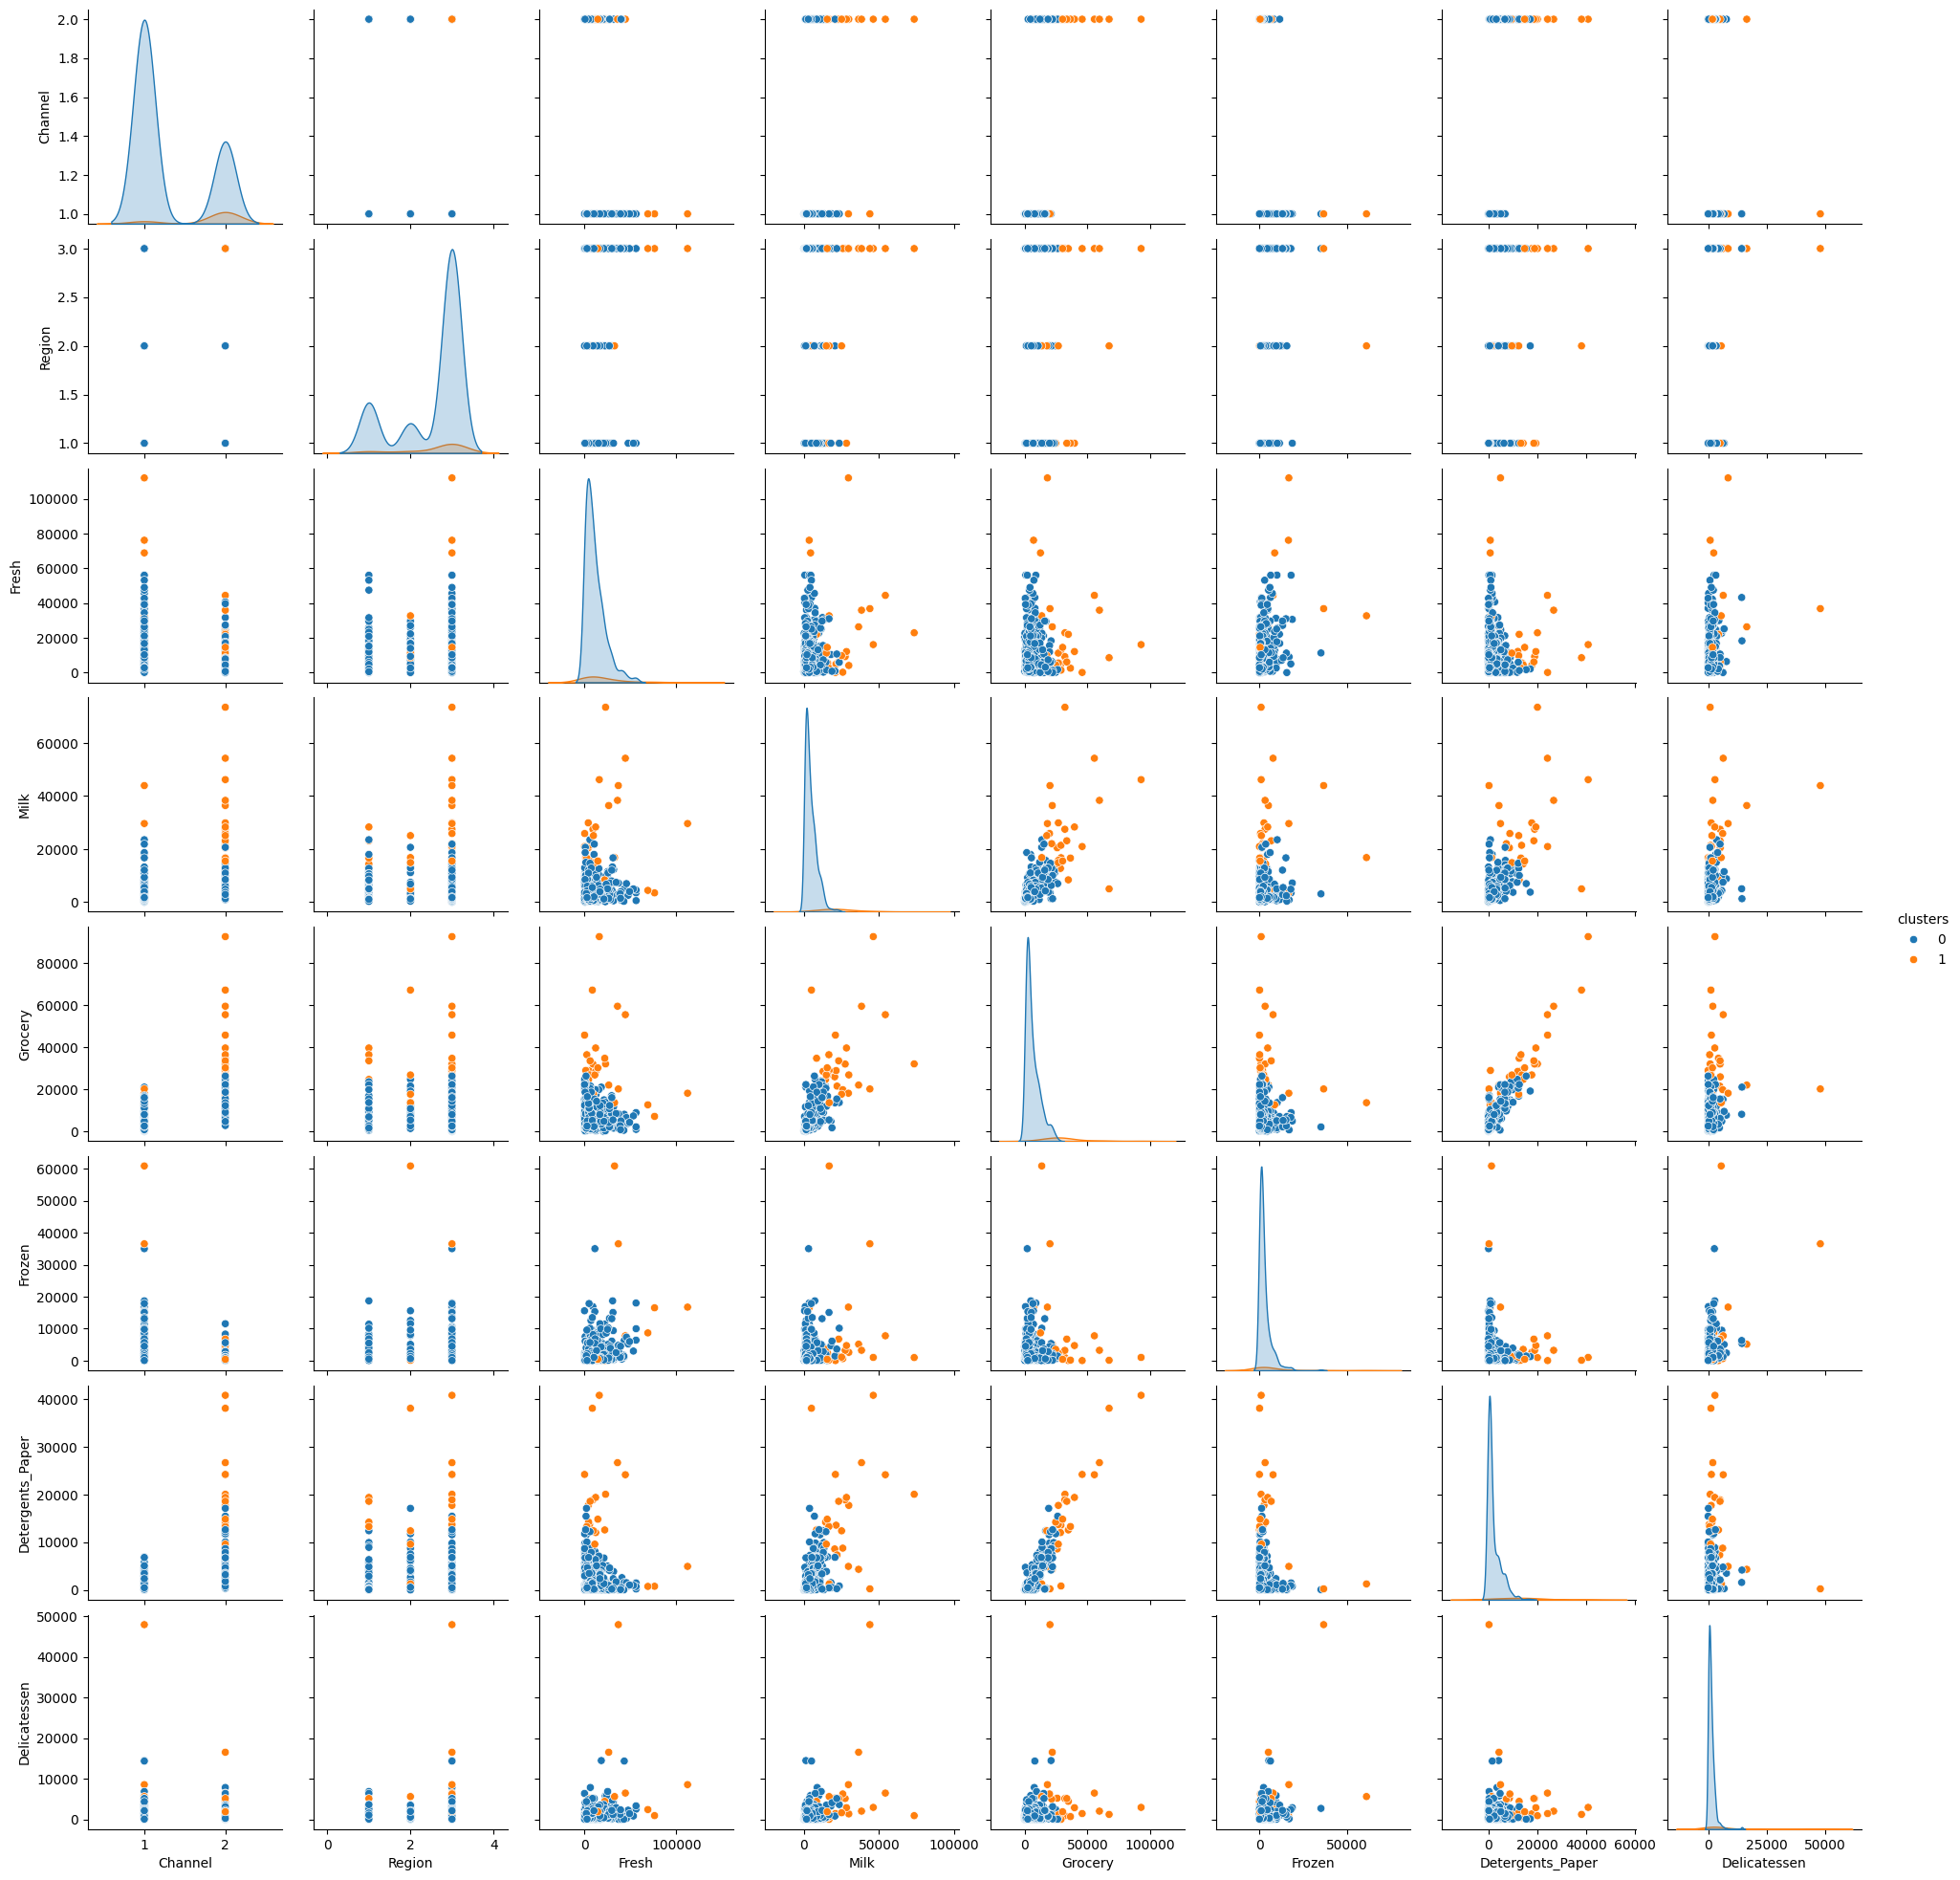

In [98]:
k_means_df_combined = pd.concat([df, k_means_df], axis=1)

display(k_means_df_combined.head())

sns.pairplot(k_means_df_combined, hue='clusters')